# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Logan Balfour
**Date:** 9/14/2025  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [50]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()

[1] "/workspaces/assignment-2-version3-logan3941/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [51]:
# Import the messy sales dataset
messy_sales <- read_csv("/workspaces/assignment-2-version3-logan3941/data/messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
cat("Column names:", paste(names(messy_sales), collapse = ", "))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity

#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [52]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows
str(messy_sales) # Structure of the dataset
summary(messy_sales) # Summary Statistics


[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [ ]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]
Sales Amount has 22 missing values and Purchase Date has 14 missing values.

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]
there are some extreme values in Sales Amount, such as 10000 and -100, whuch seem like outliers
3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]
There are some inconsistencies in Product Category, such as the capitalization of words like electronics.
4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]
yes
5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]
yes.
**YOUR OBSERVATIONS:**

the negatives seem to effect the statistics of this data, as well as the massive outliers (which cause the 3rd quartile to be less than the mean)

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [53]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- sapply(messy_sales, function(x) sum(is.na(x)))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"
# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8

In [ ]:
"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

In [54]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [55]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [56]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v) 
  uniqv[which.max(tabulate(match(v, uniqv)))]
  ### Hint: Use unique(), tabulate(), match(), and which.max()
}

In [57]:
sales_imputed$Customer_Name
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <-  ifelse(is.na(sales_imputed$Customer_Name),
                                    get_mode(sales_imputed$Customer_Name),
                                    sales_imputed$Customer_Name)
sales_imputed$Customer_Name

[1] NA            "Alice Brown" "Jane Doe"    "Jane Doe"    "John Smith" 
  [6] "John Smith"  "Jane Doe"    "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [11] "Bob Johnson" "John Smith"  "Jane Doe"    "Alice Brown" "John Smith" 
 [16] "Bob Johnson" "Alice Brown" "John Smith"  "Jane Doe"    "Jane Doe"   
 [21] NA            "Bob Johnson" "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [26] NA            "Alice Brown" "Jane Doe"    "Alice Brown" "Alice Brown"
 [31] "Jane Doe"    "John Smith"  "Bob Johnson" "Alice Brown" "John Smith" 
 [36] "Jane Doe"    "Bob Johnson" "Bob Johnson" "John Smith"  "Alice Brown"
 [41] NA            "Alice Brown" "Bob Johnson" "John Smith"  "Jane Doe"   
 [46] "John Smith"  "John Smith"  "Alice Brown" "John Smith"  "Jane Doe"   
 [51] NA            "John Smith"  "Alice Brown" "Alice Brown" "Alice Brown"
 [56] "Bob Johnson" "John Smith"  "Bob Johnson" "Bob Johnson" "Jane Doe"   
 [61] NA            "John Smith"  "John Smith"  "Bob Johnson" "Bob Johnson"
 [66] "Bob Johnson" "Alice Brown" "John Smith"  "Jane Doe"    "John Smith" 
 [71] "Bob Johnson" "Jane Doe"    "Alice Brown" "Jane Doe"    "Alice Brown"
 [76] NA            "John Smith"  "John Smith"  "Bob Johnson" "Jane Doe"   
 [81] NA            "Jane Doe"    "John Smith"  "Jane Doe"    "John Smith" 
 [86] "Jane Doe"    "Alice Brown" "John Smith"  "Bob Johnson" "Alice Brown"
 [91] "Alice Brown" "Bob Johnson" "Jane Doe"    "Alice Brown" "John Smith" 
 [96] "John Smith"  "Bob Johnson" "John Smith"  "Jane Doe"    "Alice Brown"
[101] NA            "Bob Johnson" "Bob Johnson" "Bob Johnson" "Jane Doe"   
[106] "John Smith"  "John Smith"  "Jane Doe"    "John Smith"  "Alice Brown"
[111] "Jane Doe"    "Bob Johnson" "Jane Doe"    "Alice Brown" "Bob Johnson"
[116] "Bob Johnson" "John Smith"  "John Smith"  "John Smith"  "John Smith" 
[121] NA            "Alice Brown" "Alice Brown" "Alice Brown" "John Smith" 
[126] NA            "John Smith"  "John Smith"  "Bob Johnson" "Bob Johnson"
[131] "Jane Doe"    "John Smith"  "Jane Doe"    "John Smith"  "John Smith" 
[136] "Bob Johnson" "Alice Brown" "Alice Brown" "Bob Johnson" "Jane Doe"   
[141] NA            "Bob Johnson" "Jane Doe"    "John Smith"  "John Smith" 
[146] "John Smith"  "Bob Johnson" "Alice Brown" "Alice Brown" "Alice Brown"
[151] NA            "Bob Johnson" "Bob Johnson" "Bob Johnson" "Bob Johnson"
[156] "Alice Brown" "Alice Brown" "Alice Brown" "Jane Doe"    "John Smith" 
[161] NA            "Bob Johnson" "Alice Brown" "Jane Doe"    "John Smith" 
[166] "John Smith"  "Bob Johnson" "John Smith"  "Alice Brown" "Bob Johnson"
[171] "John Smith"  "John Smith"  "Jane Doe"    "Alice Brown" "Jane Doe"   
[176] NA            "Jane Doe"    "Bob Johnson" "Bob Johnson" "Jane Doe"   
[181] NA            "Alice Brown" "Jane Doe"    "Bob Johnson" "Bob Johnson"
[186] "John Smith"  "Bob Johnson" "Bob Johnson" "John Smith"  "John Smith" 
[191] "Alice Brown" "Alice Brown" "Bob Johnson" "Alice Brown" "Jane Doe"   
[196] "Jane Doe"    "Jane Doe"    "Jane Doe"    "Jane Doe"    "John Smith"

[1] "John Smith"  "Alice Brown" "Jane Doe"    "Jane Doe"    "John Smith" 
  [6] "John Smith"  "Jane Doe"    "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [11] "Bob Johnson" "John Smith"  "Jane Doe"    "Alice Brown" "John Smith" 
 [16] "Bob Johnson" "Alice Brown" "John Smith"  "Jane Doe"    "Jane Doe"   
 [21] "John Smith"  "Bob Johnson" "Jane Doe"    "Jane Doe"    "Jane Doe"   
 [26] "John Smith"  "Alice Brown" "Jane Doe"    "Alice Brown" "Alice Brown"
 [31] "Jane Doe"    "John Smith"  "Bob Johnson" "Alice Brown" "John Smith" 
 [36] "Jane Doe"    "Bob Johnson" "Bob Johnson" "John Smith"  "Alice Brown"
 [41] "John Smith"  "Alice Brown" "Bob Johnson" "John Smith"  "Jane Doe"   
 [46] "John Smith"  "John Smith"  "Alice Brown" "John Smith"  "Jane Doe"   
 [51] "John Smith"  "John Smith"  "Alice Brown" "Alice Brown" "Alice Brown"
 [56] "Bob Johnson" "John Smith"  "Bob Johnson" "Bob Johnson" "Jane Doe"   
 [61] "John Smith"  "John Smith"  "John Smith"  "Bob Johnson" "Bob Johnson"
 [66] "Bob Johnson" "Alice Brown" "John Smith"  "Jane Doe"    "John Smith" 
 [71] "Bob Johnson" "Jane Doe"    "Alice Brown" "Jane Doe"    "Alice Brown"
 [76] "John Smith"  "John Smith"  "John Smith"  "Bob Johnson" "Jane Doe"   
 [81] "John Smith"  "Jane Doe"    "John Smith"  "Jane Doe"    "John Smith" 
 [86] "Jane Doe"    "Alice Brown" "John Smith"  "Bob Johnson" "Alice Brown"
 [91] "Alice Brown" "Bob Johnson" "Jane Doe"    "Alice Brown" "John Smith" 
 [96] "John Smith"  "Bob Johnson" "John Smith"  "Jane Doe"    "Alice Brown"
[101] "John Smith"  "Bob Johnson" "Bob Johnson" "Bob Johnson" "Jane Doe"   
[106] "John Smith"  "John Smith"  "Jane Doe"    "John Smith"  "Alice Brown"
[111] "Jane Doe"    "Bob Johnson" "Jane Doe"    "Alice Brown" "Bob Johnson"
[116] "Bob Johnson" "John Smith"  "John Smith"  "John Smith"  "John Smith" 
[121] "John Smith"  "Alice Brown" "Alice Brown" "Alice Brown" "John Smith" 
[126] "John Smith"  "John Smith"  "John Smith"  "Bob Johnson" "Bob Johnson"
[131] "Jane Doe"    "John Smith"  "Jane Doe"    "John Smith"  "John Smith" 
[136] "Bob Johnson" "Alice Brown" "Alice Brown" "Bob Johnson" "Jane Doe"   
[141] "John Smith"  "Bob Johnson" "Jane Doe"    "John Smith"  "John Smith" 
[146] "John Smith"  "Bob Johnson" "Alice Brown" "Alice Brown" "Alice Brown"
[151] "John Smith"  "Bob Johnson" "Bob Johnson" "Bob Johnson" "Bob Johnson"
[156] "Alice Brown" "Alice Brown" "Alice Brown" "Jane Doe"    "John Smith" 
[161] "John Smith"  "Bob Johnson" "Alice Brown" "Jane Doe"    "John Smith" 
[166] "John Smith"  "Bob Johnson" "John Smith"  "Alice Brown" "Bob Johnson"
[171] "John Smith"  "John Smith"  "Jane Doe"    "Alice Brown" "Jane Doe"   
[176] "John Smith"  "Jane Doe"    "Bob Johnson" "Bob Johnson" "Jane Doe"   
[181] "John Smith"  "Alice Brown" "Jane Doe"    "Bob Johnson" "Bob Johnson"
[186] "John Smith"  "Bob Johnson" "Bob Johnson" "John Smith"  "John Smith" 
[191] "Alice Brown" "Alice Brown" "Bob Johnson" "Alice Brown" "Jane Doe"   
[196] "Jane Doe"    "Jane Doe"    "Jane Doe"    "Jane Doe"    "John Smith"

In [58]:
sales_imputed$Quantity
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- ifelse(is.na(sales_imputed$Quantity), # If Quantity is NA...
                                    median(sales_imputed$Quantity, na.rm = TRUE), # Replace with median (excluding NAs)
                                    sales_imputed$Quantity)
sales_imputed$Quantity

[1]   2   3  -1   7 100   4   0   7   3   2   5   7 100 100   2   4 100   8
 [19]   4   6   8   0   2   8   1   4 100   6   2   8  10   2   5  -1  10   0
 [37]  10   7   8   3   4   0   4   2  10   0   6  -1   1   0  -1  -1   7  -1
 [55]   4   8   4   7   1   3   2   5   5   3 100 100   0   0   9  -1 100   0
 [73]   5 100  10   6   3   0   0   2   7   0  10   3   9   5   1   2   5 100
 [91]  -1   5   5   2   2  10   5  -1  10   7 100   2   7   8   3   5  10   3
[109]  10   9   5   8   4 100   1   4   0   7   8   2   4   5   7  -1   1  10
[127]   3   7   4   8  10  10   7   1   9   2  10   0   4   7   5   6   2   0
[145]   9   6 100   7   3   5   7   9   2   8  -1   5   0  10  10 100   3  -1
[163]   0   1   1   4  -1   0   5  10 100   5   3   2   9   3  -1   7   5  10
[181]   5 100   7  10   8  -1   1   8   3  -1   7   3   2   3   7   2  10   9
[199] 100  10

[1]   2   3  -1   7 100   4   0   7   3   2   5   7 100 100   2   4 100   8
 [19]   4   6   8   0   2   8   1   4 100   6   2   8  10   2   5  -1  10   0
 [37]  10   7   8   3   4   0   4   2  10   0   6  -1   1   0  -1  -1   7  -1
 [55]   4   8   4   7   1   3   2   5   5   3 100 100   0   0   9  -1 100   0
 [73]   5 100  10   6   3   0   0   2   7   0  10   3   9   5   1   2   5 100
 [91]  -1   5   5   2   2  10   5  -1  10   7 100   2   7   8   3   5  10   3
[109]  10   9   5   8   4 100   1   4   0   7   8   2   4   5   7  -1   1  10
[127]   3   7   4   8  10  10   7   1   9   2  10   0   4   7   5   6   2   0
[145]   9   6 100   7   3   5   7   9   2   8  -1   5   0  10  10 100   3  -1
[163]   0   1   1   4  -1   0   5  10 100   5   3   2   9   3  -1   7   5  10
[181]   5 100   7  10   8  -1   1   8   3  -1   7   3   2   3   7   2  10   9
[199] 100  10

In [59]:
sales_imputed$Sales_Amount
### To practice median imputation, try it on Sales_Amount column
### TODO: Impute Sales_Amount with median (alternative approach for numeric data)
sales_imputed$Sales_Amount <- ifelse(is.na(sales_imputed$Sales_Amount), 
                                    median(sales_imputed$Sales_Amount, na.rm = TRUE), 
                                    sales_imputed$Sales_Amount)
sales_imputed$Sales_Amount

[1]    362.31745    573.07908    487.68744   5000.00000    344.17461
  [6]    434.95266    489.08635    536.92019    793.39330    649.42865
 [11]    595.72472    742.61228    730.36859    675.62967    360.03699
 [16]    246.26551    309.79852           NA    343.87469    715.32581
 [21]    483.11799    455.58456           NA    690.48218    334.70565
 [26]    531.22891    604.59384    689.91677    549.75283    410.87530
 [31]    714.76140    313.95136    430.86480    564.04271    863.49333
 [36]    759.72988    442.95419    888.19199    801.93558    440.76240
 [41]    788.74566    453.04844           NA    583.29064           NA
 [46]   8000.00000    726.03517           NA    506.81020    734.26616
 [51]    288.46938    777.83666    469.85278    577.20015    519.89664
 [56]    835.17601    824.89897           NA    613.65223    615.29837
 [61]           NA    565.88355    410.04333    496.45877    768.45017
 [66]    734.49583    227.29199    809.03927    640.65134    277.75469
 [71]    101.06294    781.06214           NA    531.35555    261.73370
 [76]    388.89855    417.07484    603.38144    570.80372    839.63553
 [81]    268.86894           NA    469.74181    895.54893    562.26429
 [86]    601.36825    398.44345    837.27767           NA           NA
 [91]    550.23552    294.93889    431.38446    390.03799    196.54188
 [96]  50000.00000    761.03165    573.34918    101.19548           NA
[101]    587.93286           NA    420.45700    346.78237    658.63674
[106]    409.79823    773.39146    362.21612    590.31563    410.52397
[111]   1058.27747           NA    353.43484     29.54340    827.48824
[116]           NA    158.36953      0.00000    735.24004    239.14374
[121]   -100.00000    792.80142    191.13720    306.18832    537.21472
[126]    433.43557    194.09321    776.07924    817.39074    430.56969
[131]    421.48859    881.22385    352.85636           NA    639.68179
[136]    593.64283    654.22634    900.44590    105.64775    -56.71519
[141]    748.12005    679.59139    544.39983    310.62005    629.19766
[146]  12000.00000    690.30942    610.17876    785.89134    793.30445
[151]    442.89193    388.03480    601.31744    222.30413    202.88536
[156]    380.98084    542.00288    255.62141           NA    286.27626
[161]           NA           NA           NA    585.37292    359.34263
[166]    653.59183 100000.00000     85.02070    523.17536    513.97140
[171]    366.98752    248.33947    282.85194    515.78908    651.60904
[176]    494.38063  25000.00000    221.35168    634.06260    681.96948
[181]    443.66205    745.90477    433.90827    459.32576    716.99763
[186]    363.36029    537.74887     43.09474    591.07809    695.81159
[191]    220.83993    382.82309     78.67496    360.51964           NA
[196]    399.55400           NA    823.85020    479.31760    478.78208

[1]    362.31745    573.07908    487.68744   5000.00000    344.17461
  [6]    434.95266    489.08635    536.92019    793.39330    649.42865
 [11]    595.72472    742.61228    730.36859    675.62967    360.03699
 [16]    246.26551    309.79852    531.29223    343.87469    715.32581
 [21]    483.11799    455.58456    531.29223    690.48218    334.70565
 [26]    531.22891    604.59384    689.91677    549.75283    410.87530
 [31]    714.76140    313.95136    430.86480    564.04271    863.49333
 [36]    759.72988    442.95419    888.19199    801.93558    440.76240
 [41]    788.74566    453.04844    531.29223    583.29064    531.29223
 [46]   8000.00000    726.03517    531.29223    506.81020    734.26616
 [51]    288.46938    777.83666    469.85278    577.20015    519.89664
 [56]    835.17601    824.89897    531.29223    613.65223    615.29837
 [61]    531.29223    565.88355    410.04333    496.45877    768.45017
 [66]    734.49583    227.29199    809.03927    640.65134    277.75469
 [71]    101.06294    781.06214    531.29223    531.35555    261.73370
 [76]    388.89855    417.07484    603.38144    570.80372    839.63553
 [81]    268.86894    531.29223    469.74181    895.54893    562.26429
 [86]    601.36825    398.44345    837.27767    531.29223    531.29223
 [91]    550.23552    294.93889    431.38446    390.03799    196.54188
 [96]  50000.00000    761.03165    573.34918    101.19548    531.29223
[101]    587.93286    531.29223    420.45700    346.78237    658.63674
[106]    409.79823    773.39146    362.21612    590.31563    410.52397
[111]   1058.27747    531.29223    353.43484     29.54340    827.48824
[116]    531.29223    158.36953      0.00000    735.24004    239.14374
[121]   -100.00000    792.80142    191.13720    306.18832    537.21472
[126]    433.43557    194.09321    776.07924    817.39074    430.56969
[131]    421.48859    881.22385    352.85636    531.29223    639.68179
[136]    593.64283    654.22634    900.44590    105.64775    -56.71519
[141]    748.12005    679.59139    544.39983    310.62005    629.19766
[146]  12000.00000    690.30942    610.17876    785.89134    793.30445
[151]    442.89193    388.03480    601.31744    222.30413    202.88536
[156]    380.98084    542.00288    255.62141    531.29223    286.27626
[161]    531.29223    531.29223    531.29223    585.37292    359.34263
[166]    653.59183 100000.00000     85.02070    523.17536    513.97140
[171]    366.98752    248.33947    282.85194    515.78908    651.60904
[176]    494.38063  25000.00000    221.35168    634.06260    681.96948
[181]    443.66205    745.90477    433.90827    459.32576    716.99763
[186]    363.36029    537.74887     43.09474    591.07809    695.81159
[191]    220.83993    382.82309     78.67496    360.51964    531.29223
[196]    399.55400    531.29223    823.85020    479.31760    478.78208

In [60]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0                0 
   Purchase_Date         Quantity 
              14                0 


In [ ]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [61]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [62]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [63]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -100.0    388.7    531.3   1495.7    676.6 100000.0 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**
removal because you aren't using false data

2. **What are the trade-offs between removal and imputation?**

Removal means outliers have more of an impact while imputation makes the can give you false data

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [ ]:
"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

In [64]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE) 
IQR_sales <- Q3_sales - Q1_sales

In [65]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [67]:
### TODO: Identify outliers
outliers <- filter(sales_imputed,Sales_Amount > upper_threshold | Sales_Amount < lower_threshold)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 388.682614133283"
[1] "Q3: 676.620099081539"
[1] "IQR: 287.937484948256"
[1] "Lower threshold: -43.2236132891001"
[1] "Upper threshold: 1108.52632650392"
[1] "Number of outliers found: 8"
[1] "Outlier rows:"


# A tibble: 8 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 Jane Doe      Electronics            5000   2023-06-16   
2            46 John Smith    Books                  8000   NA           
3            96 John Smith    electronics           50000   2023-09-22   
4           121 John Smith    Electronics            -100   NA           
5           140 Jane Doe      Clothing                -56.7 2023-07-20   
6           146 John Smith    ELECTRONICS           12000   2023-01-22   
7           167 Bob Johnson   Electronics          100000   2023-09-18   
8           177 Jane Doe      ELECTRONICS           25000   2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

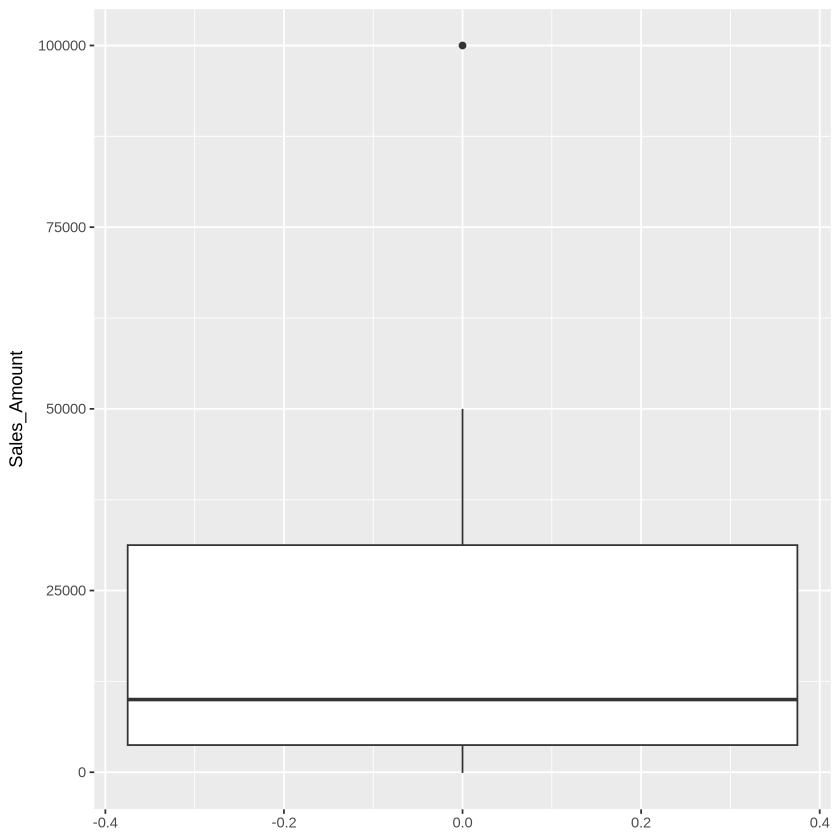

In [68]:
### TODO: Create a boxplot for Sales_Amount
library(ggplot2)
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(outliers, aes(y = Sales_Amount)) + geom_boxplot()

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [69]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- filter(sales_imputed, Sales_Amount <= upper_threshold & Sales_Amount >= lower_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 192"
[1] "Rows removed: 8"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

In [70]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed 

In [71]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(sales_outliers_capped$Sales_Amount > upper_threshold,
                                        upper_threshold,
                                        ifelse(sales_outliers_capped$Sales_Amount < lower_threshold,
                                                lower_threshold,
                                                sales_outliers_capped$Sales_Amount))
### Hint: Use ifelse() to replace values above/below thresholds

In [72]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1]  -43.22361 1108.52633


In [ ]:
### Check for remaining outliers
remaining_outliers <- filter(sales_outliers_capped,Sales_Amount > upper_threshold | Sales_Amount < lower_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))
remaining_outliers2 <- filter(messy_sales,Sales_Amount > upper_threshold | Sales_Amount < lower_threshold)
print(paste("Remaining outliers at start :", nrow(remaining_outliers2)))

[1] "Remaining outliers after capping: 0"
[1] "Remaining outliers at start capping: 8"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [74]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -43.22  388.68  531.29  529.32  676.62 1108.53 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

I choose the outlier capped dataset because it keeps all the data while minimizing the impact of outliers and non entries

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [77]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "8" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "0" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows           200        200
2      Missing Values            52         14
3   Mean Sales_Amount       1614.91     529.32
4 Median Sales_Amount        531.29     531.29
5            Outliers             8          0


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

when you can't change the numbers for legal reasons (such as accounting data)

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

They could represent big gains or losses, in general they should be treated or removed to get general trends, but each outlier should be looked at individually to see what caused it.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

unless you are missing a significant portion of your data, missing values won't likely effect your overall analytics, big outliers can still greatly skew data though. 

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

changing the data can lead to false results, and harm the people who rely on it. analysts should keep the original data document the changes made for the data set they used

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**